In [1]:
import torch
import pandas as pd
import numpy as np

In [11]:
#data_noname = pd.read_csv('data/train_set/3.data_normalize2_noname.csv')
data = pd.read_csv('data/train_set/3.data_normalize.csv')


In [3]:
data.columns

Index(['broadcast_time', 'unit_price', 'off_day', 'hour', 'temperature_seoul',
       'rain_seoul', 'humid_seoul', 'snow_seoul', 'temperature_busan',
       'rain_busan', 'humid_busan', 'snow_busan', 'pmWarning_seoul',
       'pmWarning_busan', 'day_dup', 'week_dup', 'max_watching',
       'avg_watching', 'working_time', 'pastAvg_diff', 'handling_amount',
       'product_category_가전', 'product_category_건강기능', 'product_category_농수축',
       'product_category_생활용품', 'product_category_속옷', 'product_category_의류',
       'product_category_이미용', 'product_category_잡화', 'product_category_주방',
       'product_category_침구', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [12]:
data = data.dropna(axis = 'index').reset_index(drop = True)

In [13]:
data

,broadcast_time,unit_price,off_day,hour,temperature_seoul,rain_seoul,humid_seoul,snow_seoul,temperature_busan,rain_busan,...,product_category_침구,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4
0,-0.123021,-0.585305,True,-1.255439,-2.124309,-0.126626,0.240680,-0.064213,-2.307609,-0.152131,...,0,1,0,0,0,0,0,0,0,0
1,-0.123021,-0.585305,True,-1.255439,-2.124309,-0.126626,0.240680,-0.064213,-2.307609,-0.152131,...,0,1,0,0,0,0,0,0,0,0
2,-0.123021,-0.585305,True,-1.255439,-2.124309,-0.126626,0.240680,-0.064213,-2.307609,-0.152131,...,0,1,0,0,0,0,0,0,0,0
3,-0.123021,-0.585305,True,-1.255439,-2.124309,-0.126626,0.240680,-0.064213,-2.307609,-0.152131,...,0,1,0,0,0,0,0,0,0,0
4,-0.123021,-0.559193,True,-1.104364,-2.105194,-0.126626,0.141351,-0.064213,-2.320481,-0.152131,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35321,-0.123021,-0.437520,False,1.312840,-2.076522,-0.126626,-0.504288,-0.064213,-2.384841,-0.152131,...,0,1,0,0,0,0,0,0,0,0
35322,-0.123021,-0.437520,False,1.312840,-2.076522,-0.126626,-0.504288,-0.064213,-2.384841,-0.152131,...,0,1,0,0,0,0,0,0,0,0
35323,-0.123021,-0.423849,False,1.312840,-2.076522,-0.126626,-0.504288,-0.064213,-2.384841,-0.152131,...,0,1,0,0,0,0,0,0,0,0
35324,-0.123021,-0.396507,False,1.312840,-2.076522,-0.126626,-0.504288,-0.064213,-2.384841,-0.152131,...,0,1,0,0,0,0,0,0,0,0


In [14]:
data.pastAvg_diff

0        1.163000e+06
1        2.584000e+06
2        3.991500e+06
3        3.674000e+06
4        8.870000e+06
             ...     
35321   -1.078606e+07
35322   -1.956000e+06
35323   -3.341438e+06
35324   -6.707062e+06
35325   -7.415688e+06
Name: pastAvg_diff, Length: 35326, dtype: float64

In [15]:
x_data = data.drop(columns = ['pastAvg_diff', 'handling_amount'])
y_data = data['pastAvg_diff']

In [16]:
x_data.loc[:,'off_day'] = x_data.loc[:,'off_day'].astype('float64')
x_data.loc[:,'pmWarning_busan']= x_data.loc[:,'pmWarning_busan'].astype('float64')
x_data.loc[:,'pmWarning_seoul']= x_data.loc[:,'pmWarning_seoul'].astype('float64')
x_data.loc[:,'working_time']= x_data.loc[:,'working_time'].astype('float64')


In [17]:
from sklearn.model_selection import train_test_split
train_x, testvalid_x, train_y, testvalid_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)
test_x, valid_x, test_y, valid_y = train_test_split(testvalid_x, testvalid_y, test_size = 0.5, random_state = 1)

### 모델 만들기
https://greeksharifa.github.io/pytorch/2018/11/10/pytorch-usage-03-How-to-Use-PyTorch/

In [19]:
# preprocess, set hyperparameter
import argparse
import os

# load data
from torch.utils.data import DataLoader

# train
from torch import nn
import torch.optim as optim
from torch.nn import functional as F

# visualization
import matplotlib.pyplot as plt

In [20]:
max_epoch = 100
max_patience = 5
batch_size = 32
input_size = len(train_x.columns)
output_size = 1
log_interval = 300
criterion = nn.MSELoss()


In [24]:
import pdb
class DataIterator:
    def __init__(self, X,Y, batch_size):
        self.x = torch.from_numpy(X.values).unsqueeze(dim=1)
        self.y = torch.from_numpy((Y.values)/1000).unsqueeze(dim=1) # 1000으로 나눠줌
        self.batch_size = batch_size
        self.start_index = 0

    def __iter__(self):
        return self

    def __next__(self):
        start_index = self.start_index
        end_index = start_index + self.batch_size
        x_data = self.x[start_index : start_index + self.batch_size]
        y_data = self.y[start_index : start_index + self.batch_size]
        if(x_data.shape[0] != self.batch_size):  # small frag TODO
            raise StopIteration
        self.start_index += self.batch_size
        return x_data, y_data

for x_data, y_data in DataIterator(train_x, train_y, 32): 
    pass


In [25]:
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):
    def __init__(self,input_size, output_size):
        super(DNN, self).__init__()
        hds1=20
        hds2=10
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hds1)
        self.fc2 = nn.Linear(hds1, hds2)
        self.fc3 = nn.Linear(hds2, output_size)
        self.ELU =nn.ELU()
        
    def forward(self, x):
        h1 = self.ELU(self.fc1(x.float().view(-1, self.input_size)))
        h2 = self.ELU(self.fc2(h1))
        h3 = self.fc3(h2)
        return h3


In [28]:
from torch import nn
model = DNN(input_size, output_size)
optimizer = optim.Adam(model.parameters())

# train
idx = 0
best_loss =0
for epoch in range(max_epoch):
    loss_sum =0
    idx = 0
    model.train()
    for x_data, y_data in DataIterator(train_x, train_y, batch_size): 
        idx +=1
        optimizer.zero_grad()
        output = model(x_data.float())
        loss = criterion(output, y_data.float())
        loss_sum += loss
        loss.backward()
        optimizer.step()
        #if(idx % log_interval == 0):
        #    print("epoch : " + str(epoch) + " loss : " + str(int(loss_sum/(log_interval))))
    
    model.eval()
    loss_sum =0
    print("=====validation=====")
    idx =0
    for x_data, y_data in DataIterator(valid_x, valid_y, batch_size): 
        idx +=1
        output = model(x_data.float())
        loss = criterion(output, y_data.float())
        loss_sum += loss
    print("loss " + str(int(loss_sum/idx)))

        
    if(best_loss == 0 or best_loss>loss_sum):
        print("find new best")
        best_loss = loss_sum
        patience =0
    else:
        patience +=1
    if(patience >max_patience):
        print("early stopping")
        break


# test
model.eval()
loss_sum =0
abs_loss =0 
idx =0 
outputs = []
ys = []
for x_data, y_data in DataIterator(test_x, test_y, batch_size): 
    idx +=1
    output = model(x_data.float())
    outputs.append(output)
    ys.append(y_data)

    loss = criterion(output, y_data.float())
    loss_sum += loss
print('total loss : '+str(int(loss_sum/idx) ))

    



=====validation=====
loss 186464560
find new best
=====validation=====
loss 170066800
find new best
=====validation=====
loss 154007920
find new best
=====validation=====
loss 146104320
find new best
=====validation=====
loss 142275920
find new best
=====validation=====
loss 139917024
find new best
=====validation=====
loss 138301088
find new best
=====validation=====
loss 137158976
find new best
=====validation=====
loss 136286944
find new best
=====validation=====
loss 135620336
find new best
=====validation=====
loss 135107744
find new best
=====validation=====
loss 134702048
find new best
=====validation=====
loss 134386016
find new best
=====validation=====
loss 134121152
find new best
=====validation=====
loss 133895208
find new best
=====validation=====
loss 133696128
find new best
=====validation=====
loss 133520776
find new best
=====validation=====
loss 133360136
find new best
=====validation=====
loss 133213224
find new best
=====validation=====
loss 133067952
find new best


#### 기록 : 1번파일 -> loss 12,438,049,128,448 early stopping total loss : 12,910,166,278,144
#### 기록 : 2번파일 1000으로 나누었을때 중간에러 -> 12,906,635,000(다시 1000 곱해줌)
#### 기록 : 2번파일 10000으로 나누었을때 중간에러 -> 2867223(다시 1000 곱해줌)

#### -> mse 식 수정

## 오차탐색


In [82]:
new_output = []
new_y = []
for i in range(len(outputs)):
    new_output.append(outputs[i].detach().numpy().squeeze())
    new_y.append(ys[i].numpy().squeeze())

new_output = np.array(new_output).reshape(-1)
new_y = np.array(new_y).reshape(-1)

In [88]:
new_y.shape

(3520,)

In [90]:
temp = pd.DataFrame(index = range(0,len(new_output)),data = {'output' : new_output, 'y' : new_y})
temp = temp.reset_index()

In [93]:
temp['diff'] = temp['y'] - temp['output']
temp['diff_abs'] = abs(temp['diff'])

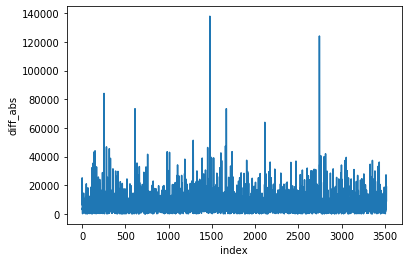

In [94]:
sns.lineplot(data = temp,x = "index", y = 'diff_abs')

## 평균에러

In [95]:
temp['diff_abs'].mean()

7577.383499135235

{'whiskers': [<matplotlib.lines.Line2D at 0x1cefa0a6ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cefa0aaa88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cefa094608>],
 'medians': [<matplotlib.lines.Line2D at 0x1cefa0aea08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cefa0aeb08>],
 'means': []}

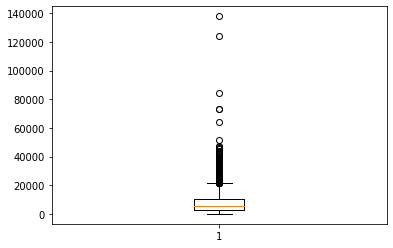

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(temp['diff_abs'])